# THE SPARK FOUNDATION
### GRIP JAN2021

# TASK1:- Prediction using Supervised ML

# BY:- NISHITH KUMAR

## Predict the percentage of an student based on the number of study hours.

### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing and Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### Reading the first five values in dataset

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Number of rows and columns

In [4]:
data.shape

(25, 2)

### Description of dataset

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

###  Plotting the distribution of scores

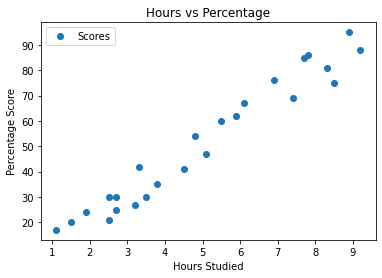

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

### Train-Test Split

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Training the Simple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


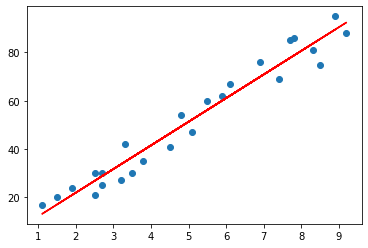

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.show()

### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


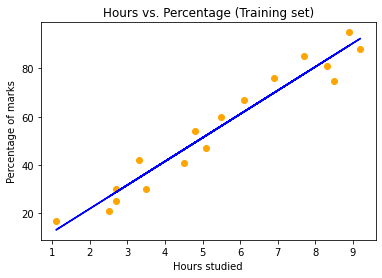

In [13]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

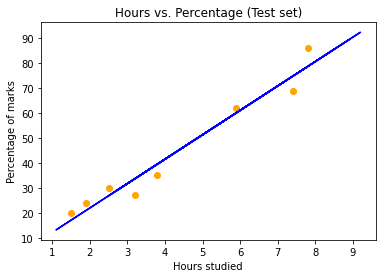

In [14]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [15]:
#Comparing the actual values with the predicted ones.
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [16]:
#predicting the score 
data = np.array(9.25)
data = data.reshape(-1, 1)
pred = regressor.predict(data)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652


In [18]:
from sklearn.metrics import r2_score

print("The R-Square of my model is: ",r2_score(y_test,y_pred))

The R-Square of my model is:  0.9568211104435257


### Conclusion: We used a linear regression model to predict the score of student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91

### THANK YOU